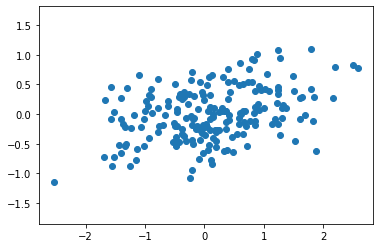

In [ ]:
import torch
import matplotlib.pyplot as plt

Z = torch.randn(200, 2)

cov = torch.tensor([[1,0.2],[0.2, 0.5]])

# torch.matmul(Z, cov) == Z @ cov 매트릭스 곱셈
Z = Z @ cov

plt.scatter(Z[:,0], Z[:,1])
plt.axis("equal")
plt.show()

In [ ]:
def findPC(Z):
    dim = Z.shape[1]
    w = torch.randn(dim)
    # w 길이가 1이 아니다!
    w /= ((w ** 2).sum() ** 0.5) # 길이를 1로 만들어줌

    lr = 0.1

    for epoch in range(100):
        w.requires_grad=True # 매번 경사도 계산

        variance = ((Z @ w.view(-1,1)) ** 2).mean()

        variance.backward()

        with torch.no_grad():
            w = w + lr * w.grad
            w /= ((w ** 2).sum() ** 0.5) # 단위벡터로 바꿔 주기

    return w, variance.item()
    

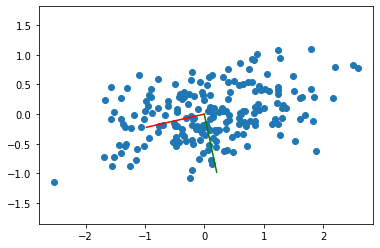

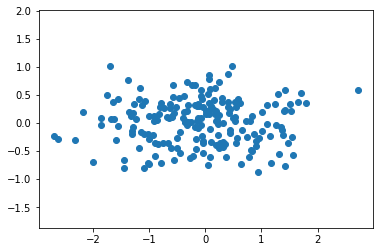

In [ ]:
def PCA(Z, n):
    W = []
    V = []

    for _ in range(n):
        w,v = findPC(Z)
        W.append(w)
        V.append(v)
        Z = Z - (Z @ w.view(-1,1)) * w # 내적 

    return W, V


In [ ]:
def transform(Z, W):
    return Z @ torch.stack(W).T

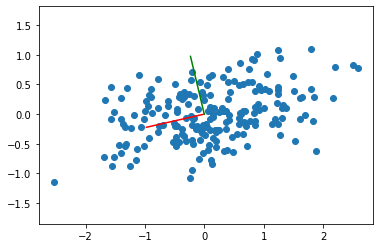

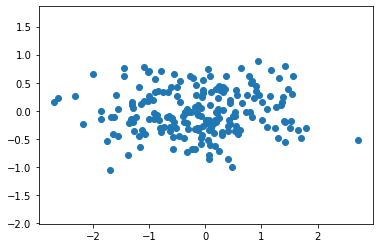

In [ ]:
  W, V = PCA(Z, 2)


plt.scatter(Z[:,0], Z[:,1])
plt.axis('equal')
plt.plot([0, W[0][0]], [0, W[0][1]], c="red") # PC1
plt.plot([0, W[1][0]], [0, W[1][1]], c="green")
plt.show()

Zt = transform(Z, W)

plt.scatter(Zt[:,0], Zt[:,1])
plt.axis("equal")
plt.show()

In [ ]:
import requests

r = requests.get("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
with open("iris.data", "wb") as f:
    f.write(r.content)

vectors = []
answers = []

for line in open("iris.data", "r"):
    try:
        items = line.strip().split(",")
        vectors.append([float(i) for i in items[:4]])
        answers.append(items[4])
    except:
        pass

print(vectors)
print(answers)
species = {a: i for i, a in enumerate(set(answers))}
species

[[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [4.7, 3.2, 1.3, 0.2], [4.6, 3.1, 1.5, 0.2], [5.0, 3.6, 1.4, 0.2], [5.4, 3.9, 1.7, 0.4], [4.6, 3.4, 1.4, 0.3], [5.0, 3.4, 1.5, 0.2], [4.4, 2.9, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.4, 3.7, 1.5, 0.2], [4.8, 3.4, 1.6, 0.2], [4.8, 3.0, 1.4, 0.1], [4.3, 3.0, 1.1, 0.1], [5.8, 4.0, 1.2, 0.2], [5.7, 4.4, 1.5, 0.4], [5.4, 3.9, 1.3, 0.4], [5.1, 3.5, 1.4, 0.3], [5.7, 3.8, 1.7, 0.3], [5.1, 3.8, 1.5, 0.3], [5.4, 3.4, 1.7, 0.2], [5.1, 3.7, 1.5, 0.4], [4.6, 3.6, 1.0, 0.2], [5.1, 3.3, 1.7, 0.5], [4.8, 3.4, 1.9, 0.2], [5.0, 3.0, 1.6, 0.2], [5.0, 3.4, 1.6, 0.4], [5.2, 3.5, 1.5, 0.2], [5.2, 3.4, 1.4, 0.2], [4.7, 3.2, 1.6, 0.2], [4.8, 3.1, 1.6, 0.2], [5.4, 3.4, 1.5, 0.4], [5.2, 4.1, 1.5, 0.1], [5.5, 4.2, 1.4, 0.2], [4.9, 3.1, 1.5, 0.1], [5.0, 3.2, 1.2, 0.2], [5.5, 3.5, 1.3, 0.2], [4.9, 3.1, 1.5, 0.1], [4.4, 3.0, 1.3, 0.2], [5.1, 3.4, 1.5, 0.2], [5.0, 3.5, 1.3, 0.3], [4.5, 2.3, 1.3, 0.3], [4.4, 3.2, 1.3, 0.2], [5.0, 3.5, 1.6, 0.6], [5.1, 3.8, 1.9, 0.4], [4.8, 3.0

{'Iris-setosa': 2, 'Iris-versicolor': 1, 'Iris-virginica': 0}

In [ ]:
X = torch.tensor(vectors)
Z = X - X.mean(dim=0) # 축 이동
Z.mean(dim=0) # 어쨌든 0, 0, 0, 0

tensor([ 5.0545e-07,  1.1126e-07,  3.8783e-07, -6.0399e-08])

In [ ]:
W, V = PCA(Z, 4)

[4.1966753005981445,
 0.2347193956375122,
 7.889066182542592e-05,
 0.037419870495796204]

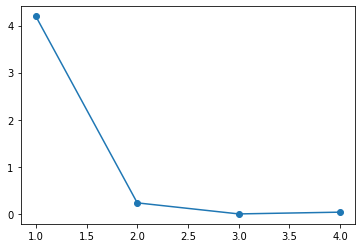

In [ ]:
#scree plot

plt.plot(range(1,5), V, "-o") # -o 점 찍기
plt.show() # 1, 2 차원 만으로 표현이 가능할 것임이 보임!

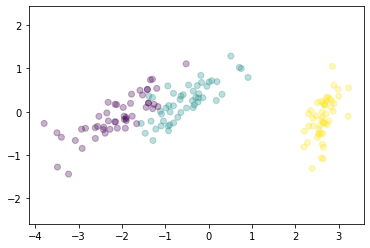

In [ ]:
Zt = transform(Z, W)

plt.scatter(Zt[:,0], Zt[:, 1], c=[species[a] for a in answers], alpha=0.3)
plt.axis("equal")
plt.show()

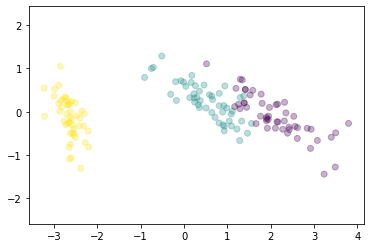

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
Zt2 = pca.fit_transform(X)

plt.scatter(Zt2[:,0], Zt[:,1],c=[species[a] for a in answers], alpha=0.3)
plt.axis("equal")
plt.show()